In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv("normalized_df.csv")
df

,user,temp,rain,humid,snow,weekend
0,-1.758752,-0.812820,0.052766,1.158174,-0.109117,1
1,-0.821734,-1.282561,-0.320771,-0.610735,-0.109117,0
2,-0.852706,-1.319454,-0.252855,-0.100093,-0.109117,0
3,-0.663309,-1.075360,-0.320771,-0.887215,-0.109117,0
4,-1.015833,-1.697392,-0.320771,-1.764616,-0.109117,0
...,...,...,...,...,...,...
326,1.739152,0.471138,-0.320771,0.689850,-0.109117,0
327,1.657381,0.597689,-0.320771,0.235633,-0.109117,0
328,1.816868,0.797597,-0.320771,0.396443,-0.109117,0
329,1.861336,1.012949,-0.320771,-0.150875,-0.109117,1


In [33]:
Y = df[['user']]
Y

,user
0,-1.758752
1,-0.821734
2,-0.852706
3,-0.663309
4,-1.015833
...,...
326,1.739152
327,1.657381
328,1.816868
329,1.861336


In [34]:
X= df[['temp', 'weekend', 'rain', 'humid']]
X

,temp,weekend,rain,humid
0,-0.812820,1,0.052766,1.158174
1,-1.282561,0,-0.320771,-0.610735
2,-1.319454,0,-0.252855,-0.100093
3,-1.075360,0,-0.320771,-0.887215
4,-1.697392,0,-0.320771,-1.764616
...,...,...,...,...
326,0.471138,0,-0.320771,0.689850
327,0.597689,0,-0.320771,0.235633
328,0.797597,0,-0.320771,0.396443
329,1.012949,1,-0.320771,-0.150875


In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [37]:
X = sm.add_constant(X, has_constant='add')
X.head()

,const,temp,weekend,rain,humid
0,1.0,-0.812820,1,0.052766,1.158174
1,1.0,-1.282561,0,-0.320771,-0.610735
2,1.0,-1.319454,0,-0.252855,-0.100093
3,1.0,-1.075360,0,-0.320771,-0.887215
4,1.0,-1.697392,0,-0.320771,-1.764616


In [38]:
Y.head()

,user
0,-1.758752
1,-0.821734
2,-0.852706
3,-0.663309
4,-1.015833


In [39]:
# 독립변수와 종속변수 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(231, 5) (100, 5) (231, 1) (100, 1)


In [40]:
# 회귀 모델 생성
lm = sm.OLS(Y_train, X_train)
lm_train = lm.fit()

In [41]:
lm_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   user   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     94.83
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           3.22e-47
Time:                        02:15:18   Log-Likelihood:                -208.54
No. Observations:                 231   AIC:                             427.1
Df Residuals:                     226   BIC:                             444.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0524      0.048      1.100      0.273      -0.042       0.146
temp           0.8187      0.045     18.381      0.000       0.731       0.906
weekend       -0.1789      0.088     -2.023      0.044      -0.353      -0.005
rain          -0.3358      0.058     -5.766      0.000      -0.450      -0.221
humid         -0.2223      0.052     -4.283      0.000      -0.325      -0.120
==============================================================================
Omnibus:                       10.825   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.564
Skew:                          -0.444   Prob(JB):                      0.00308
Kurtosis:                       3.642   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
Y_predict = lm_train.predict(X_test)
print(Y_predict)

198   -0.683043
7     -1.270851
263    0.515446
220   -0.073854
66     1.460385
         ...   
179   -1.182390
133    0.310112
188   -1.054259
297    0.412881
132    0.378794
Length: 100, dtype: float64


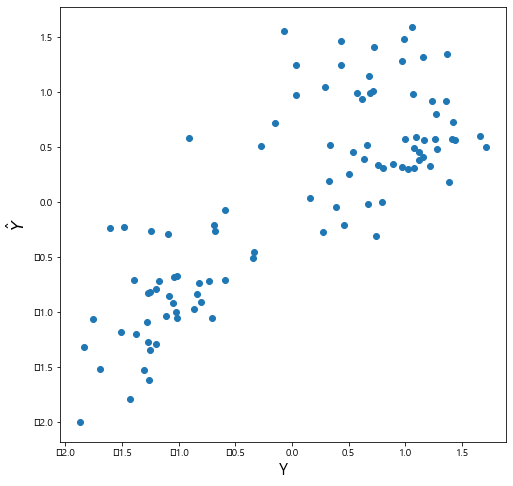

In [43]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, Y_predict)
plt.xlabel('Y', size=16)
plt.ylabel('$\hat{Y}$', size=16)
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [45]:
# MSE(mean squared error), R-squared (모형 성능 확인)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, Y_predict)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))
print('R-square : {0:.3f}'.format(r_square))

MAE : 0.501
MSE : 0.381
RMSE : 0.618
R-square : 0.652


# KNN Regression

In [49]:
import mglearn
import sklearn.preprocessing as preprocessing
from sklearn.neighbors import KNeighborsRegressor


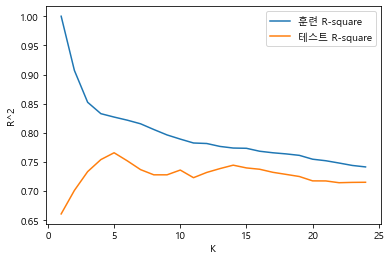

In [51]:
training_rsquare = []
test_rsquare = []
# 여러 k값에 대한 모델 생성 n_neighbors 를 적용
k_settings = range(1, 25)

for k in k_settings:
    # 모델 생성
    corolla_knn = KNeighborsRegressor(n_neighbors=k)
    corolla_knn.fit(X_train, Y_train)
    # 훈련 세트 정확도 저장
    training_rsquare.append(corolla_knn.score(X_train, Y_train))
    # 일반화 정확도 저장
    test_rsquare.append(corolla_knn.score(X_test, Y_test))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(k_settings, training_rsquare, label="훈련 R-square")
plt.plot(k_settings, test_rsquare, label="테스트 R-square")
plt.ylabel("R^2")
plt.xlabel("K")
plt.legend()

In [52]:
# 최적의 K 판단
from itertools import compress
best_k_temp = test_rsquare==max(test_rsquare)
best_k = list(compress(k_settings, best_k_temp))[0]
print('최적의 K값:', best_k)

최적의 K값: 5


In [55]:
# 최적의 K값에서 테스트 데이터의 Y예측값
best_corolla_knn = KNeighborsRegressor(n_neighbors=best_k)
best_corolla_knn.fit(X_train, Y_train)
Y_predict_kr = best_corolla_knn.predict(X_test)

In [57]:
# MSE(mean squared error), R-squared (모형 성능 비교)
mae_kr = mean_absolute_error(Y_test, Y_predict_kr)
mae_lr = mean_absolute_error(Y_test, Y_predict)
mse_kr = mean_squared_error(Y_test, Y_predict_kr)
mse_lr = mean_squared_error(Y_test, Y_predict)
rmse_kr = np.sqrt(mse_kr)
rmse_lr = np.sqrt(mse_lr)
r_square_kr = r2_score(Y_test, Y_predict_kr)
r_square_lr = r2_score(Y_test, Y_predict)
print('MAE from KNN Regression : {0:.3f}'.format(mae_kr))
print('MAE from Linear Regression : {0:.3f}'.format(mae_lr))
print('MSE from KNN Regression : {0:.3f}'.format(mse_kr))
print('MSE from Linear Regression : {0:.3f}'.format(mse_lr))
print('RMSE from KNN Regression : {0:.3f}'.format(rmse_kr))
print('RMSE from Linear Regression : {0:.3f}'.format(rmse_lr))
print('R-square from KNN Regression : {0:.3f}'.format(r_square_kr))
print('R-square from Linear Regression : {0:.3f}'.format(r_square_lr))

MAE from KNN Regression : 0.361
MAE from Linear Regression : 0.501
MSE from KNN Regression : 0.257
MSE from Linear Regression : 0.381
RMSE from KNN Regression : 0.507
RMSE from Linear Regression : 0.618
R-square from KNN Regression : 0.766
R-square from Linear Regression : 0.652
